In [1]:
import pandas as pd

In [2]:
estate = pd.read_csv("p.csv")
estate.head(10)

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,three,63,9373,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,Basic,has pool and no yard
1,1,80771,thirty-nine,98,39381,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,Luxury,has pool and has yard
2,2,55712,fifty-eight,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,Basic,has pool and no yard
3,3,32316,forty-seven,6,27939,10,4,2012,False,True,659,7141,359,False,3,3232561.2,Basic,no pool and no yard
4,4,70429,nineteen,90,38045,3,7,1990,True,False,8435,2429,292,True,4,7055052.0,Luxury,has pool and has yard
5,5,39223,thirty-six,17,39489,8,6,2012,False,True,2009,4552,757,False,1,3926647.2,Basic,has pool and no yard
6,6,58682,ten,99,6450,10,9,1995,True,True,5930,9453,848,False,5,5876376.5,Luxury,has pool and has yard
7,7,86929,one hundred,11,98155,3,4,2003,True,False,6326,4748,654,False,10,8696869.3,Basic,no pool and has yard
8,8,51522,three,61,9047,8,3,2012,True,True,632,5792,807,True,5,5154055.2,Basic,no pool and no yard
9,9,39686,forty-two,15,71019,5,8,2021,True,True,5198,5342,591,True,3,3970892.1,Basic,no pool and no yard


In [3]:
data = estate.copy()

In [6]:
#data = data.drop(columns=["Unnamed: 0"])
for colname in data.select_dtypes("bool"):
    data[colname], _ = data[colname].factorize()


In [7]:
data.head(10)

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,75523,0,63,9373,3,8,2005,0,0,4313,9005,956,0,7,7559081.5,0,0
1,80771,1,98,39381,8,6,2015,1,1,3653,2436,128,1,2,8085989.5,1,1
2,55712,2,19,34457,6,8,2021,0,1,2937,8852,135,1,9,5574642.1,0,0
3,32316,3,6,27939,10,4,2012,0,0,659,7141,359,0,3,3232561.2,0,2
4,70429,4,90,38045,3,7,1990,1,1,8435,2429,292,1,4,7055052.0,1,1
5,39223,5,17,39489,8,6,2012,0,0,2009,4552,757,0,1,3926647.2,0,0
6,58682,6,99,6450,10,9,1995,1,0,5930,9453,848,0,5,5876376.5,1,1
7,86929,7,11,98155,3,4,2003,1,1,6326,4748,654,0,10,8696869.3,0,3
8,51522,0,61,9047,8,3,2012,1,0,632,5792,807,1,5,5154055.2,0,2
9,39686,8,15,71019,5,8,2021,1,0,5198,5342,591,1,3,3970892.1,0,2


In [8]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [22]:
distortions = []
K = range(1,100,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

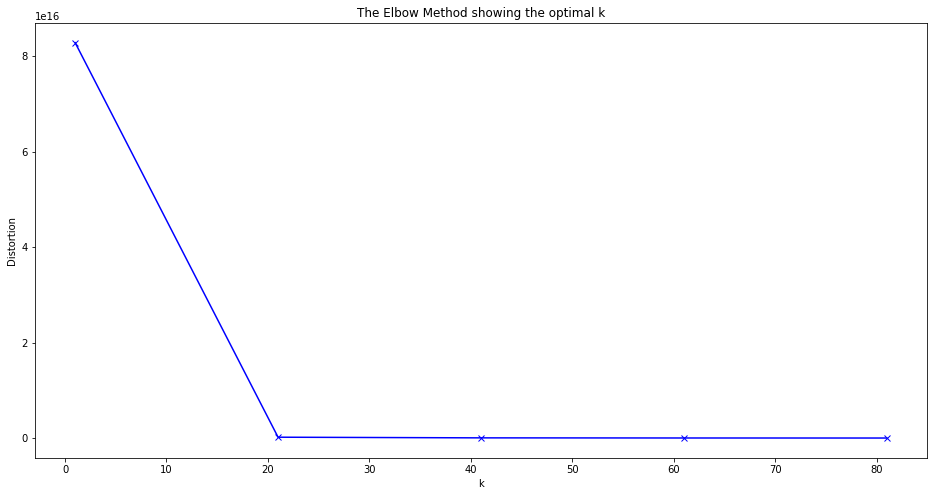

In [23]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
data.head()

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,75523,0,63,9373,3,8,2005,0,0,4313,9005,956,0,7,7559081.5,0,0
1,80771,1,98,39381,8,6,2015,1,1,3653,2436,128,1,2,8085989.5,1,1
2,55712,2,19,34457,6,8,2021,0,1,2937,8852,135,1,9,5574642.1,0,0
3,32316,3,6,27939,10,4,2012,0,0,659,7141,359,0,3,3232561.2,0,2
4,70429,4,90,38045,3,7,1990,1,1,8435,2429,292,1,4,7055052.0,1,1


In [16]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(data)

KMeans(n_clusters=3)

NameError: name 'df' is not defined

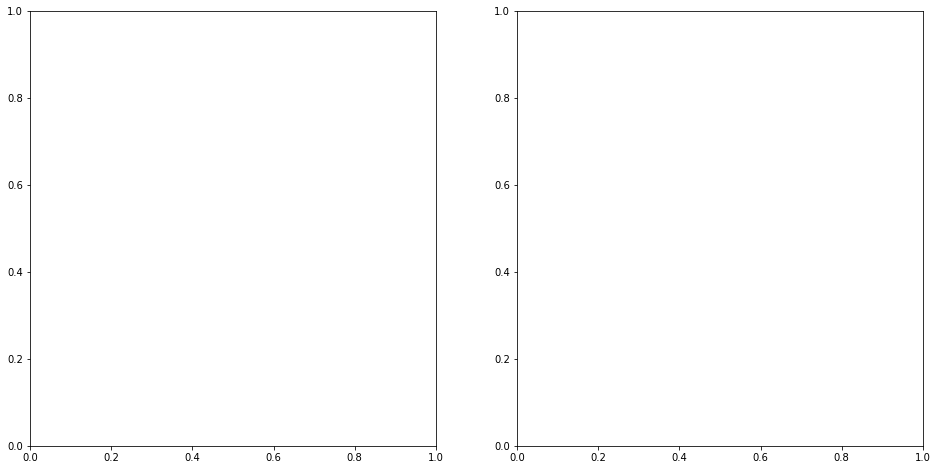

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[1].scatter(df[0], df[1], c=df['k_means'], cmap=plt.cm.Set1)
axes[1].set_title('K_Means', fontsize=18)